In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')
plt.rc('axes', titlesize=16, labelsize=20, labelpad=12)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=5,        # Total features
    n_informative=2,     # Informative features
    n_classes=2,         # Binary classification
    random_state=47,
    shuffle=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=47
)

In [2]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=47)
dt_model.fit(X_train, y_train)

# Permutation Importance for DT
perm_importance_dt = permutation_importance(
    dt_model, X_test, y_test, scoring="accuracy", n_repeats=10, random_state=47
)
pi_importances_dt_mean = perm_importance_dt.importances_mean

# Logistic Regression Model
logr_model = LogisticRegression(random_state=47)
logr_model.fit(X_train, y_train)

# Permutation Importance for LogR
perm_importance_logr = permutation_importance(
    logr_model, X_test, y_test, scoring="accuracy", n_repeats=10, random_state=47
)
pi_importances_logr_mean = perm_importance_logr.importances_mean

# Feature labels
features = [f"Feature {i}" for i in range(X.shape[1])]

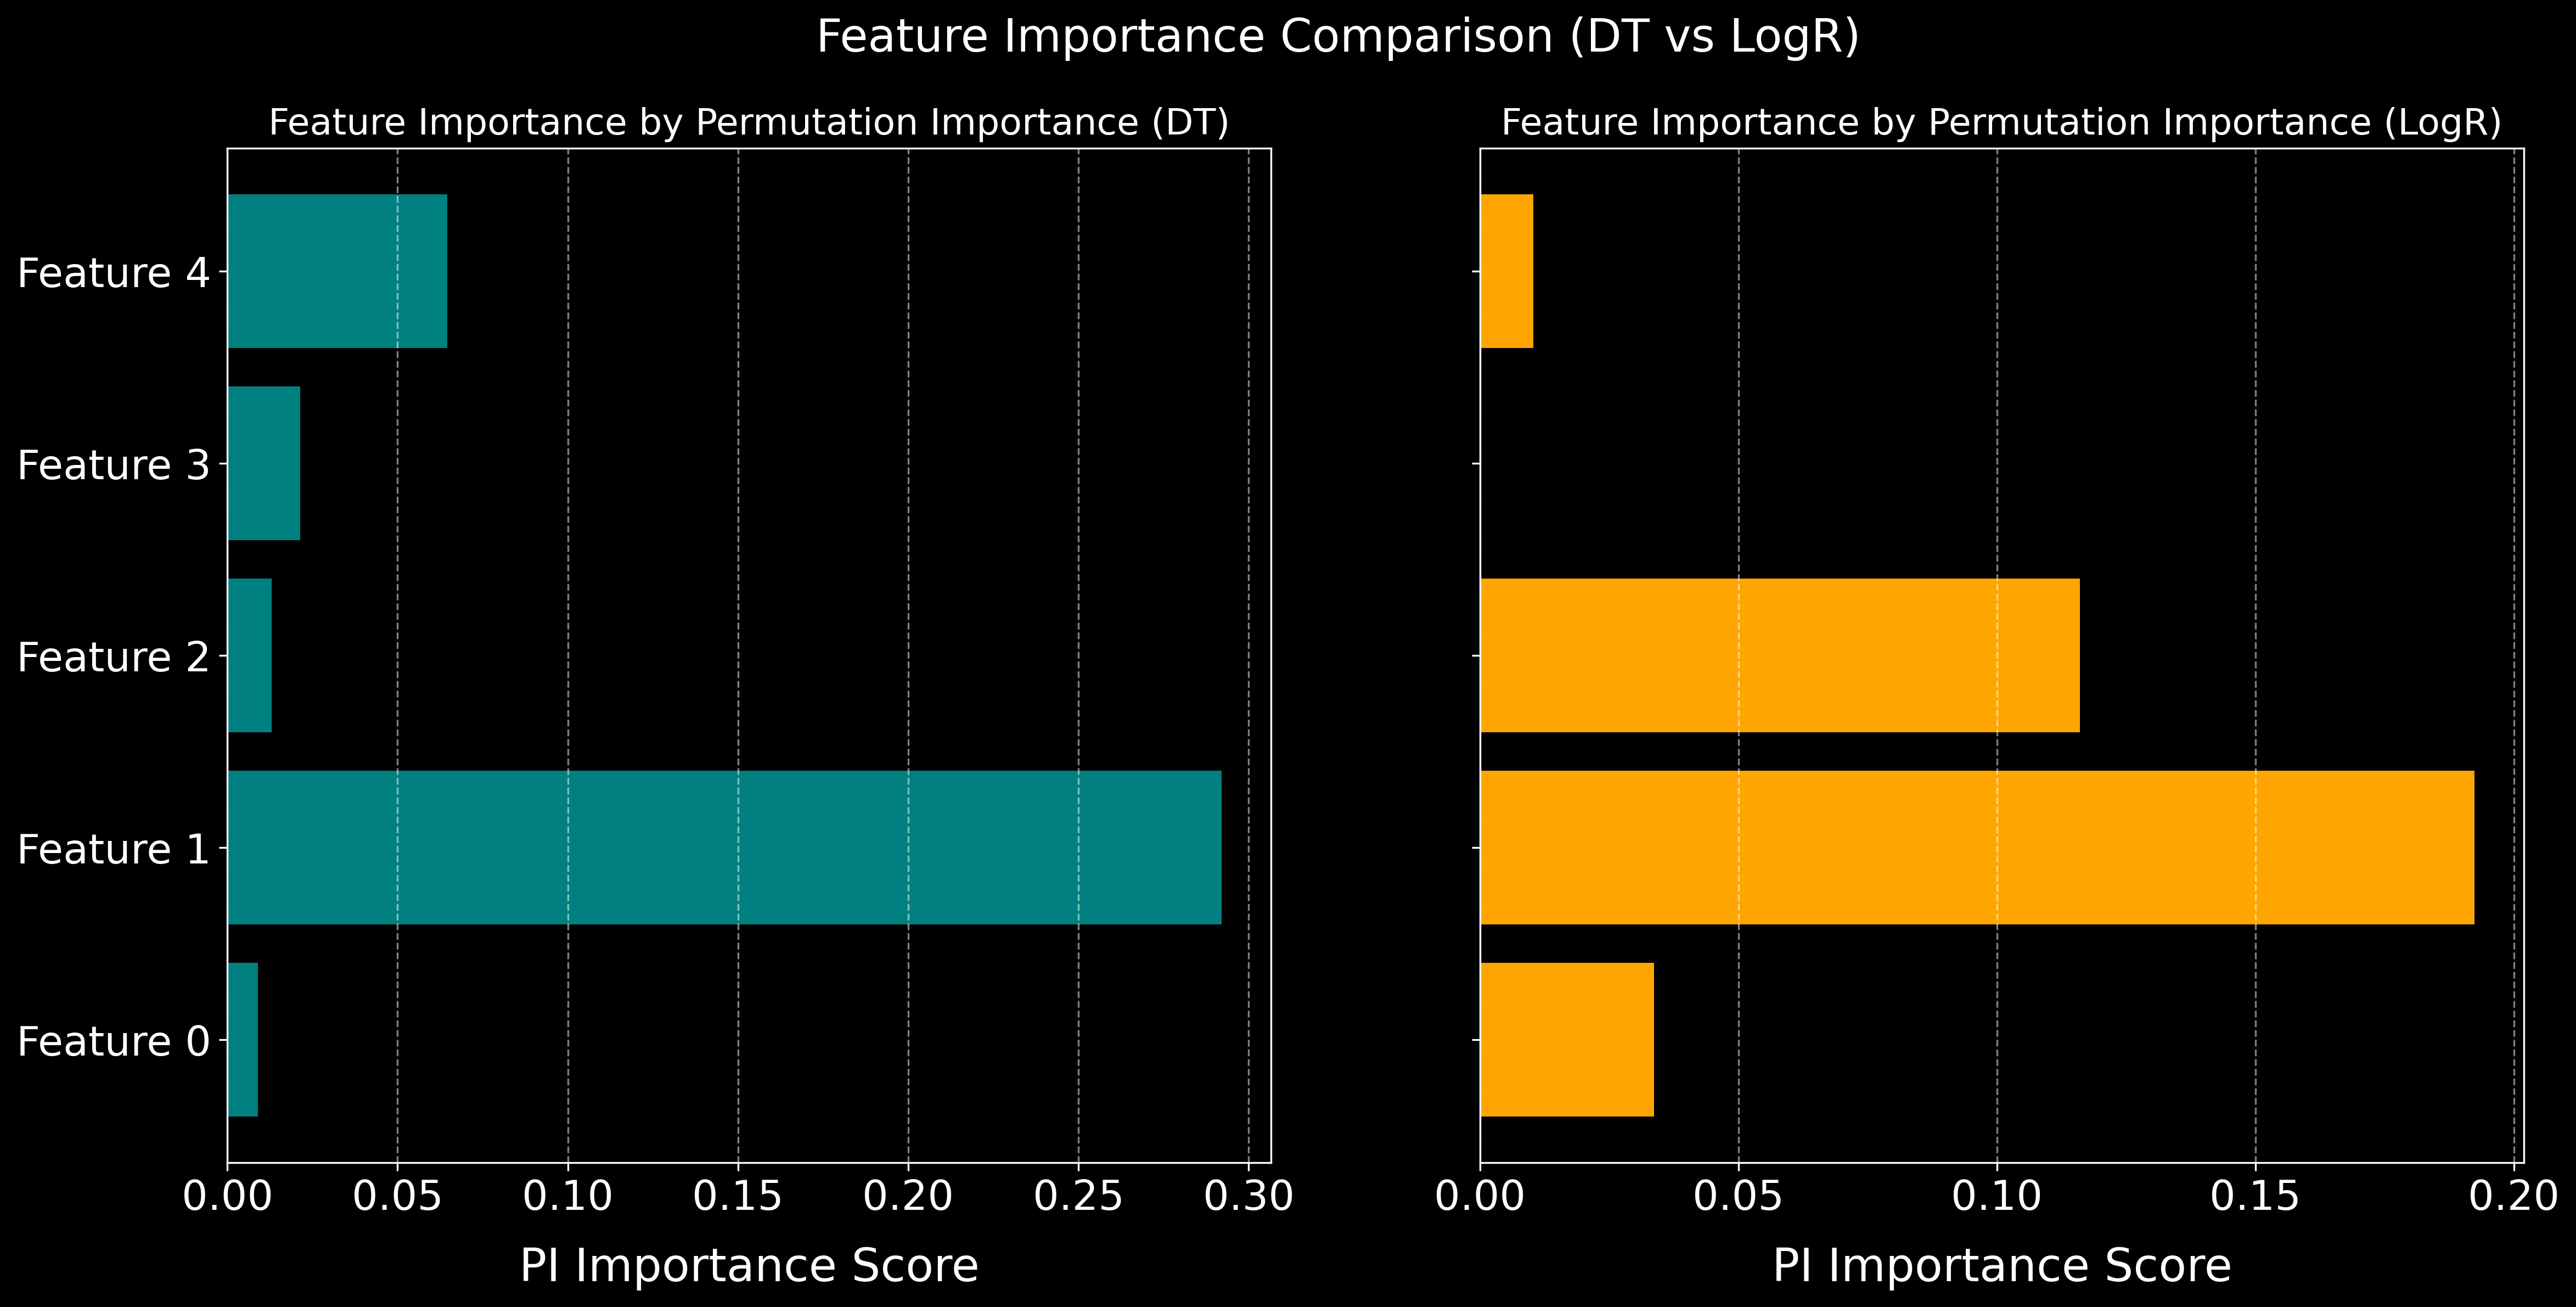

Decision Tree Test Accuracy: 0.8300
Logistic Regression Test Accuracy: 0.8700


In [3]:
# Create a 1x2 plot for PI
fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=300, sharey=True)

# Plot PI for Decision Tree
axes[0].barh(features, pi_importances_dt_mean, color="teal")
axes[0].set_title("Feature Importance by Permutation Importance (DT)")
axes[0].set_xlabel("PI Importance Score")
axes[0].grid(axis="x", linestyle="--", alpha=0.5)

# Plot PI for Logistic Regression
axes[1].barh(features, pi_importances_logr_mean, color="orange")
axes[1].set_title("Feature Importance by Permutation Importance (LogR)")
axes[1].set_xlabel("PI Importance Score")
axes[1].grid(axis="x", linestyle="--", alpha=0.5)

fig.suptitle('Feature Importance Comparison (DT vs LogR)', fontsize=20)
plt.show()

# Print test accuracy for both models
test_accuracy_dt = accuracy_score(y_test, dt_model.predict(X_test))
test_accuracy_logr = accuracy_score(y_test, logr_model.predict(X_test))
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.4f}")
print(f"Logistic Regression Test Accuracy: {test_accuracy_logr:.4f}")